In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_pickle('df_all_features.pkl')

In [3]:
df.columns

Index(['dtime', 'sales', 'price', 'sales_smpy', 'num_accounts', 'permit_total',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'personal_income', 'real_gdp', 'consumer_spending',
       'population', 'person_per_account', 'hum_wind', 'hum_temp',
       'wind_temp'],
      dtype='object')

In [4]:
df = df[['sales', 'price', 'sales_smpy', 'num_accounts', 'permit_total',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'personal_income', 'real_gdp', 'consumer_spending',
       'population', 'person_per_account', 'hum_wind', 'hum_temp',
       'wind_temp']]

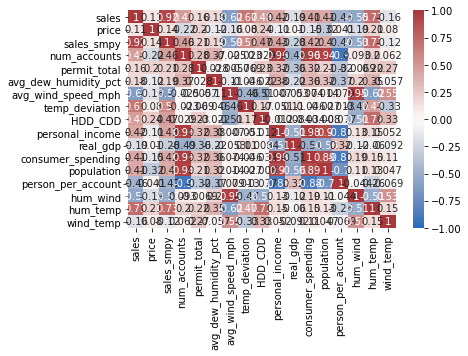

In [5]:
sns.heatmap(df.corr(), cmap='vlag', annot=True, vmin=-1, vmax=1);

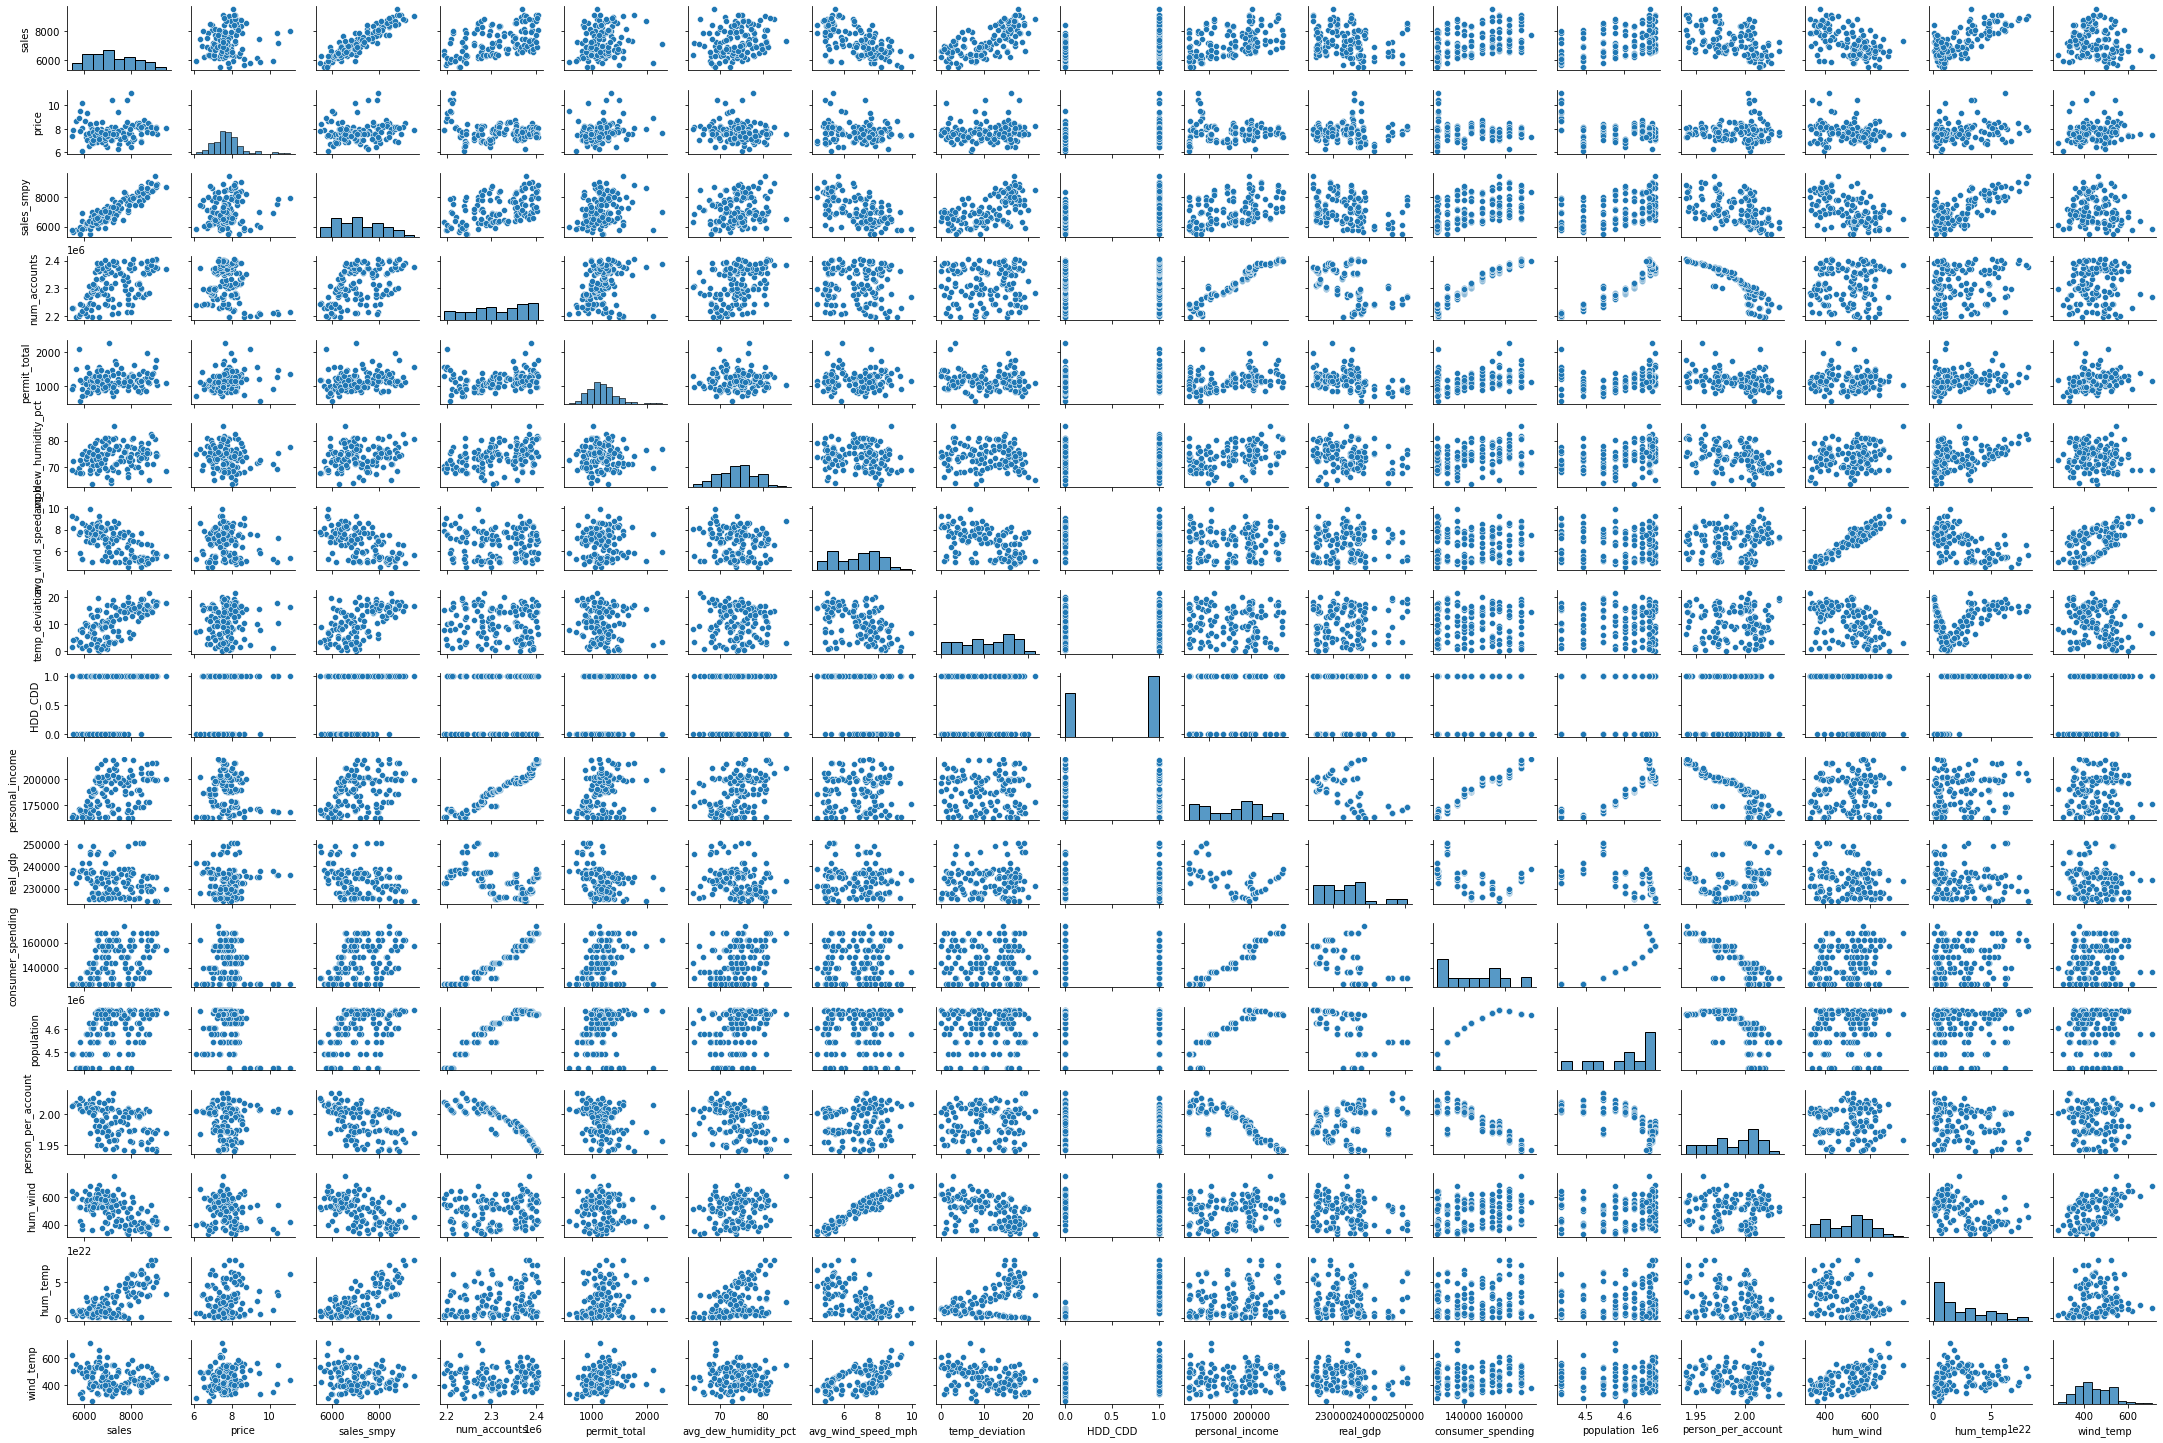

In [6]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [7]:
df.columns

Index(['sales', 'price', 'sales_smpy', 'num_accounts', 'permit_total',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'personal_income', 'real_gdp', 'consumer_spending',
       'population', 'person_per_account', 'hum_wind', 'hum_temp',
       'wind_temp'],
      dtype='object')

In [8]:
selected_features = df[['price', 'sales_smpy', 'num_accounts', 'permit_total',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'personal_income', 'real_gdp', 'consumer_spending',
       'population', 'person_per_account', 'hum_wind', 'hum_temp',
       'wind_temp']]
selected_features

,price,sales_smpy,num_accounts,permit_total,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending,population,person_per_account,hum_wind,hum_temp,wind_temp
0,7.86,6320,2195097,1561,70.291034,7.846897,15.106897,0,163603.3,232658.5,127072.9,4435586.0,2.020679,551.566476,1.860556e+21,391.506021
1,7.88,6341,2195066,1311,69.325352,8.550000,7.764789,0,163603.3,232658.5,127072.9,4435586.0,2.020707,592.731761,3.902404e+21,489.361056
2,8.66,5794,2197717,1494,68.307285,9.088742,4.431126,0,163603.3,232658.5,127072.9,4435586.0,2.018270,620.827269,5.015326e+21,550.494854
3,8.94,5737,2200910,2094,69.818667,7.596667,2.212667,1,170908.0,235378.6,127072.9,4435586.0,2.015342,530.389138,1.067913e+22,510.592224
4,9.35,6082,2201846,1560,71.646667,7.518000,10.014667,1,170908.0,235378.6,127072.9,4435586.0,2.014485,538.639640,2.410200e+22,563.960264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,7.62,8430,2400894,1354,81.647143,5.265000,14.407857,1,216152.7,235046.0,168095.0,4664450.0,1.942797,429.872207,7.427229e+22,418.082368
129,7.33,7934,2404131,1285,80.922297,6.945946,6.270946,1,218781.5,236872.9,168095.0,4664450.0,1.940181,562.081903,3.680310e+22,495.044138
130,7.55,7068,2401511,983,81.157447,7.121277,8.759574,0,218781.5,236872.9,168095.0,4664450.0,1.942298,577.944627,9.041945e+21,400.503626
131,7.57,7344,2400112,979,80.674468,7.639007,11.066667,0,218781.5,236872.9,168095.0,4664450.0,1.943430,616.272834,6.785162e+21,411.997116


In [9]:
X = selected_features

y = df["sales"]

In [10]:
#Split the data 80-20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

In [11]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
lasso_model = LassoCV(cv=5, max_iter = 1000000)
X_train_model = lasso_model.fit(X_tr, y_train)
X_train_model.score(X_tr, y_train)

0.9198702051737878

In [12]:
lasso_model.alpha_

3.243356407612283

In [13]:
coef = list(zip(X_train.columns, lasso_model.coef_))
coef

[('price', 41.13325287054651),
 ('sales_smpy', 503.9167379562482),
 ('num_accounts', 163.0449658528796),
 ('permit_total', -15.388304444235242),
 ('avg_dew_humidity_pct', -6.071288505681941),
 ('avg_wind_speed_mph', -53.423354935674034),
 ('temp_deviation', 282.7545712852128),
 ('HDD_CDD', 48.79347503405498),
 ('personal_income', 0.0),
 ('real_gdp', 56.80554115880246),
 ('consumer_spending', 14.310713944520046),
 ('population', 72.65977723250943),
 ('person_per_account', -0.0),
 ('hum_wind', -0.0),
 ('hum_temp', 56.16970728578828),
 ('wind_temp', -11.823826446235374)]

In [14]:
coef_df = pd.DataFrame(coef, columns=["feature", "coefficient"])
coef_df.round(5)

,feature,coefficient
0,price,41.13325
1,sales_smpy,503.91674
2,num_accounts,163.04497
3,permit_total,-15.38830
4,avg_dew_humidity_pct,-6.07129
5,avg_wind_speed_mph,-53.42335
6,temp_deviation,282.75457
7,HDD_CDD,48.79348
8,personal_income,0.00000
9,real_gdp,56.80554


In [15]:
test_set_pred = lasso_model.predict(X_te)

In [16]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [17]:
mae(y_test, test_set_pred)

242.6179766329559

In [18]:
r2_score(y_test, test_set_pred)

0.8862176247196307

In [19]:
df_X_tr = pd.DataFrame(X_tr, columns=selected_features.columns)
df_y_tr = pd.DataFrame(y_train, columns=["sales"]).reset_index()
del df_y_tr["index"]
df_res = df_y_tr.join(df_X_tr)
df_res['res'] = abs(X_train_model.predict(df_X_tr[selected_features.columns])-df_res["sales"])
df_res

,sales,price,sales_smpy,num_accounts,permit_total,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending,population,person_per_account,hum_wind,hum_temp,wind_temp,res
0,7174,-0.996632,0.091839,-0.823167,-1.316420,-0.948371,-0.083624,1.150329,-1.187051,-0.794374,0.546623,-0.639829,-0.290279,1.438624,-0.346896,-1.132022,-1.681295,214.661557
1,6031,1.097948,-1.384461,-1.639261,-1.574062,0.543702,1.213436,-0.009939,-1.187051,-1.149663,0.659753,-1.302668,-2.065259,0.723689,1.407943,-0.944229,0.062014,22.274125
2,8386,0.209338,1.033676,-0.671253,-1.247473,0.610463,-1.051940,1.255969,0.842424,-0.924668,2.652023,-0.988677,-0.689157,0.502762,-0.897386,1.997826,-0.064833,35.942377
3,6563,0.285505,-0.646878,1.288901,0.962444,-0.792532,1.183144,-1.564614,-1.187051,1.402174,-0.023869,1.659610,0.822803,-1.677445,0.900499,-0.795925,0.979232,47.955193
4,7004,0.006227,-0.246314,0.674230,-0.427373,1.710910,-0.093894,0.008345,-1.187051,0.790826,0.464111,0.259879,0.589198,-0.679249,0.401271,-0.832072,-1.134809,229.953134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,6983,-1.694826,0.324461,-1.176650,0.882611,-1.201999,-0.649113,1.140385,0.842424,-1.506292,0.511225,-1.331769,-1.357806,0.690418,-0.943321,0.431005,0.439704,503.892502
102,7068,-0.184189,-0.158939,1.219411,3.941659,0.708559,-0.668741,-1.247497,-1.187051,1.231593,-0.620245,1.223018,0.939189,-1.367881,-0.478588,-0.633933,-1.115118,105.979076
103,7312,-0.260356,0.593395,0.585659,1.985755,-0.692109,1.052864,0.975305,-1.187051,0.668392,-0.080072,0.623978,0.854956,-0.109893,0.811860,-1.114914,-0.670348,481.523504
104,8879,-0.209578,1.455800,1.415956,0.617711,1.850127,-1.178321,0.684775,0.842424,1.698069,0.216308,1.659610,0.822803,-1.946526,-0.749384,2.514550,-0.457096,141.076080


In [20]:
df_res.sort_values(['res']).tail(10)

,sales,price,sales_smpy,num_accounts,permit_total,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending,population,person_per_account,hum_wind,hum_temp,wind_temp,res
88,8276,0.501310,1.140341,-0.528936,-1.193042,-0.919333,0.031770,0.131198,0.842424,-0.653346,-0.391343,-0.639829,-0.290279,0.757306,-0.229848,-0.037082,0.867233,468.683493
80,6315,-1.072799,-0.152130,-0.486841,-0.550750,0.180549,0.774694,-0.576829,-1.187051,-0.308368,0.520141,-0.368623,0.035584,1.134382,0.837308,-0.878267,-0.014287,470.169075
76,6880,-0.298439,-0.089720,1.425858,-0.728560,1.732636,0.232435,-0.299894,-1.187051,1.858754,0.503598,1.659610,0.822803,-1.967422,0.763511,-0.750637,-0.679527,481.233090
103,7312,-0.260356,0.593395,0.585659,1.985755,-0.692109,1.052864,0.975305,-1.187051,0.668392,-0.080072,0.623978,0.854956,-0.109893,0.811860,-1.114914,-0.670348,481.523504
40,7336,-0.298439,0.107726,1.335168,1.709969,-0.628113,-0.677381,0.498254,0.842424,1.626913,0.154003,1.659610,0.822803,-1.775637,-0.824736,0.318998,0.124991,490.770834
101,6983,-1.694826,0.324461,-1.176650,0.882611,-1.201999,-0.649113,1.140385,0.842424,-1.506292,0.511225,-1.331769,-1.357806,0.690418,-0.943321,0.431005,0.439704,503.892502
23,9481,0.361671,1.816648,0.909034,-0.325767,-1.278369,-1.002380,1.246628,0.842424,0.739102,-0.583494,0.623978,0.854956,-0.817208,-1.288547,0.458432,-0.000334,616.222462
82,7264,-0.298439,-0.687729,1.134595,-0.565266,2.774339,1.493523,-1.331804,-1.187051,1.402174,-0.023869,1.659610,0.822803,-1.348248,2.528969,-0.075307,1.158977,633.356898
31,5896,3.065584,-0.210002,-1.604966,-0.906369,-0.689533,-1.211049,-1.634968,0.842424,-1.149663,0.659753,-1.302668,-2.065259,0.642559,-1.350071,-0.665543,-1.379603,634.607196
8,7670,-0.095328,-0.777374,0.251740,0.595939,1.507430,0.705974,0.664006,-1.187051,0.363757,-1.148482,0.259879,0.589198,0.254677,1.205905,-0.976391,-0.777935,752.501169


In [21]:
df_drop_res = df_res[df_res.res <= 700]
df_drop_res

,sales,price,sales_smpy,num_accounts,permit_total,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,personal_income,real_gdp,consumer_spending,population,person_per_account,hum_wind,hum_temp,wind_temp,res
0,7174,-0.996632,0.091839,-0.823167,-1.316420,-0.948371,-0.083624,1.150329,-1.187051,-0.794374,0.546623,-0.639829,-0.290279,1.438624,-0.346896,-1.132022,-1.681295,214.661557
1,6031,1.097948,-1.384461,-1.639261,-1.574062,0.543702,1.213436,-0.009939,-1.187051,-1.149663,0.659753,-1.302668,-2.065259,0.723689,1.407943,-0.944229,0.062014,22.274125
2,8386,0.209338,1.033676,-0.671253,-1.247473,0.610463,-1.051940,1.255969,0.842424,-0.924668,2.652023,-0.988677,-0.689157,0.502762,-0.897386,1.997826,-0.064833,35.942377
3,6563,0.285505,-0.646878,1.288901,0.962444,-0.792532,1.183144,-1.564614,-1.187051,1.402174,-0.023869,1.659610,0.822803,-1.677445,0.900499,-0.795925,0.979232,47.955193
4,7004,0.006227,-0.246314,0.674230,-0.427373,1.710910,-0.093894,0.008345,-1.187051,0.790826,0.464111,0.259879,0.589198,-0.679249,0.401271,-0.832072,-1.134809,229.953134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,6983,-1.694826,0.324461,-1.176650,0.882611,-1.201999,-0.649113,1.140385,0.842424,-1.506292,0.511225,-1.331769,-1.357806,0.690418,-0.943321,0.431005,0.439704,503.892502
102,7068,-0.184189,-0.158939,1.219411,3.941659,0.708559,-0.668741,-1.247497,-1.187051,1.231593,-0.620245,1.223018,0.939189,-1.367881,-0.478588,-0.633933,-1.115118,105.979076
103,7312,-0.260356,0.593395,0.585659,1.985755,-0.692109,1.052864,0.975305,-1.187051,0.668392,-0.080072,0.623978,0.854956,-0.109893,0.811860,-1.114914,-0.670348,481.523504
104,8879,-0.209578,1.455800,1.415956,0.617711,1.850127,-1.178321,0.684775,0.842424,1.698069,0.216308,1.659610,0.822803,-1.946526,-0.749384,2.514550,-0.457096,141.076080


In [22]:
lasso_model_dropres = LassoCV(cv=5, max_iter = 1000000)
X_train_model = lasso_model_dropres.fit(df_drop_res[selected_features.columns], 
            df_drop_res["sales"])
lasso_model_dropres.score(df_drop_res[selected_features.columns], 
            df_drop_res["sales"])

0.9253799774301502

In [23]:
lasso_model_dropres.alpha_

10.759210872107426

In [24]:
list(zip(X_train.columns, lasso_model_dropres.coef_))

[('price', 19.832769477931105),
 ('sales_smpy', 529.6074226945356),
 ('num_accounts', 198.75708882475865),
 ('permit_total', -14.681549718196775),
 ('avg_dew_humidity_pct', -0.0),
 ('avg_wind_speed_mph', -0.0),
 ('temp_deviation', 252.88520752284245),
 ('HDD_CDD', 31.732414234461746),
 ('personal_income', 0.0),
 ('real_gdp', 47.13597387799742),
 ('consumer_spending', 0.0),
 ('population', 19.228649632473253),
 ('person_per_account', -0.0),
 ('hum_wind', -62.7506215436169),
 ('hum_temp', 67.06562471496926),
 ('wind_temp', -0.0)]

In [25]:
test_set_dropres_pred = lasso_model_dropres.predict(X_te)

In [26]:
r2_score(y_test, test_set_dropres_pred)

0.8925915795641279